<span style='color:Black'>
<div class="alert alert-info">
    <h1 align="center"> Support Vector Machine (SVM) </h1> 
    <h3 align="center"> Machine Learning </h3>
    <h4 align="center"> Prof. Shahab </h4>
    <h5 align="center"> National Yunlin University of Science and Technology (YunTech) </h5>
    <h5 align="center">  </h5>
</div>
</span>

#### <span style='color:Black'> **Introduction** </span>

- Support Vector Machine (SVM) is machine learning algorithms that are used for classification and regression purposes.
- The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. Then, the current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.
- SVM can be used for linear and non-linear classification.

<br> 

#### <span style='color:Black'> **How does SVM work?** </span>

<span style='color:darkgreen'>**Goal:** create a line that classifies the data into two classes</span>

<img src='./imgs/pic1.jpg' width='40%'>

<span style='color:darkgreen'>In the above visualizations, Which one do you think would better differentiate the data into two classes? (RED line or GREEN line)</span>

<img src='./imgs/pic2.jpg' width='40%'>

<span style='color:darkgreen'>The green line cannot be the ideal line as it lies too close to the blue class.</span>

<br>

#### <span style='color:Black'> **Support Vector Machines intuition** </span>

- **Hyperplane**
    - A hyperplane is a decision boundary which separates between given set of data points having different class labels.
    
<br>

- **Support vector**
    - Support vectors are the sample data points, which are closest to the hyperplane.

<br>

- **Margin**
    - A margin is a separation gap between the two lines on the closest data points.

<span style='color:darkgreen'>Functionality of SVM</span>

<img src='./imgs/pic3.png'>

**Linearly and non-linearly separable**

<span style='color:darkgreen'>Non-linearly separable points.</span>

<img src='./imgs/pic4.jpg'>

<br>

#### <span style='color:Black'> **SVM kernels** </span>

- In practice, SVM algorithm is implemented using a kernel.
<br>
-  In simple words, a kernel is just a function that maps the data to a higher dimension where data is separable.
<br>

There are four popularly known SVM kernels:
1. Linear
<span style='color:Blue'>$$K(x_{i}, x_{j}) = x_{i}^T x_{j} $$</span>
<br>

2. Polynomial (for degree-d polynomials)
<span style='color:Blue'>$$K(x_{i}, x_{j}) = (\gamma x_{i}^T x_{j} + r) \times d, \gamma >0 $$</span> 


3. Radial Basis Function (RBF) <br> 

<img src='./imgs/pic5.jpg' width = '85%'>

4. Sigmoid
<span style='color:Blue'>$$K(x, y) = tanh(\alpha x^T y + c) $$</span>

<br>

#### <span style='color:Black'>**SVM classifier in Python**</span>

- Scikit-Learn provides useful libraries to implement Support Vector Machine algorithm on a dataset.

<span style='color:darkgreen'> **Example:** Classification of wine database</span>

<br> <span style = 'color:RebeccaPurple'>**Import libraries**</span>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#classic datasets from sklearn library
from sklearn import datasets
from sklearn.model_selection import train_test_split

#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC

#different matrices to score model performance
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

<br> <span style = 'color:RebeccaPurple'>**Load data**</span>

In [21]:
#loading WINE dataset
df = datasets.load_wine()

# storing into DataFrame
data = pd.DataFrame(df.data, columns = df.feature_names)
data['target'] = df.target

<br> <span style = 'color:RebeccaPurple'>**Exploratory data analysis**</span>

In [22]:
data.shape

(178, 14)

In [23]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [24]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [25]:
data['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [26]:
data['target'].value_counts()/(len(data))

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

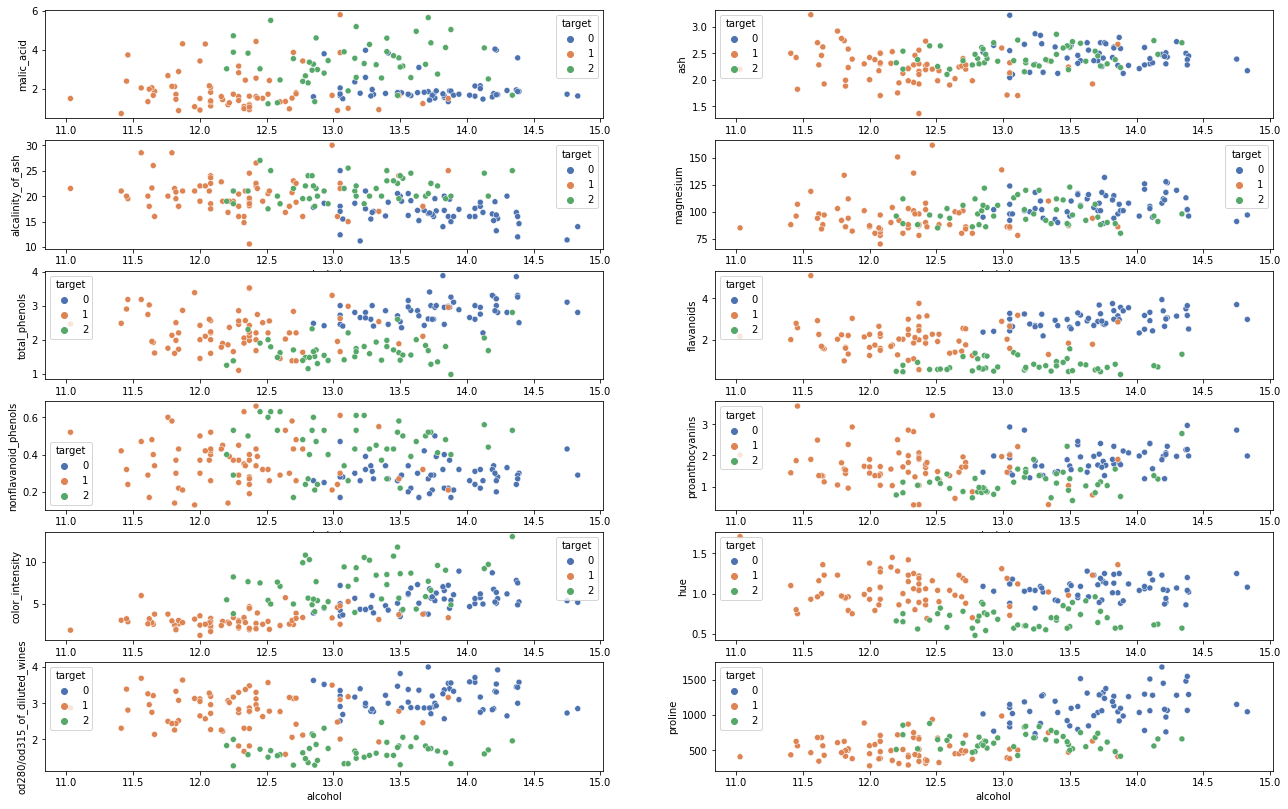

In [27]:
#visualizing datapoints separability
fig, axes = plt.subplots(6, 2, figsize=(22,14))
axes = [ax for axes_rows in axes for ax in axes_rows]
columns = list(data.columns)
columns.remove('target')
columns.remove('alcohol')

#looping through every columns of data and plotting against alcohol
for i, col in enumerate(columns):
   sns.scatterplot(data= data, x='alcohol', y=col, hue='target', palette="deep", ax=axes[i])

<span style = 'color:RebeccaPurple'>**Splitting data into training and test sets**</span>

In [28]:
#splitting data into 80:20 train test ratio
labels = data['target']
data = data.drop('target', axis=1)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)

<span style = 'color:RebeccaPurple'>**Classification with SVM**</span>

In [29]:
#training SVM model with linear kernel
model = SVC(kernel='linear', random_state = 10)
model.fit(train_data, train_labels)

#predicting output for test data
pred = model.predict(test_data)

<span style = 'color:RebeccaPurple'>**Calculate metrics**</span>

- **Confusion matrix:** A confusion matrix for a two classes (+, -) or (1, 0) is shown below

<img src='./imgs/pic6.jpg' width = '35%'>


- There are four quadrants in the confusion matrix, which are symbolized as below. <br><br>
        - **True Positive (TP):** The number of instances that were positive (+) and correctly classified as positive (+v).<br><br>
        - **False Negative (FN):** The number of instances that were positive (+) and incorrectly classified as negative (-). <br><br>
        - **False Positive (FP):**  The number of instances that were negative (-) and incorrectly classified as (+).<br><br>
        - **True Negative (TN):** The number of instances that were negative (-) and correctly classified as (-).

**Precision**: For each class, it is defined as the ratio of true positives to the sum of true and false positives.
<span style='color:Blue'>$$Precision = \frac{TP}{TP+FP}$$</span>

**Recall**: For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives.
<span style='color:Blue'>$$Recall = \frac{TP}{TP+FN}$$</span>

**F1_Score:** The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

<span style='color:red'>$$ F1\_Score = 2 \times \frac{Precision \times Recall}{Precision + recall} $$</span>

**Support:** Support is the number of actual occurrences of the class in the specified dataset.

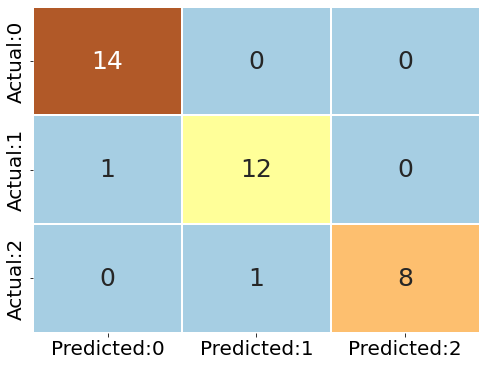

In [30]:
#building confusion matrix
cm = confusion_matrix(test_labels, pred)

#defining the size of the canvas
plt.rcParams['figure.figsize'] = [8,6]

#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1', 'Predicted:2'], index = ['Actual:0','Actual:1', 'Actual:2'])

#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [31]:
print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.92      0.92      0.92        13
           2       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



<span style = 'color:RebeccaPurple'>**Run SVM with different hyperparameters**</span>

<span style = 'color:darkgreen'>Run SVM with linear kernel and C = 10.0 (C: Regularization parameter)</span>

In [32]:
model = SVC(kernel='linear', C = 10)
model.fit(train_data, train_labels)

pred = model.predict(test_data)

print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.92      0.92      0.92        13
           2       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



<span style = 'color:darkgreen'>Run SVM with **rbf kernel** and C = 10.0</span>

In [33]:
model = SVC(kernel='rbf', C = 10)
model.fit(train_data, train_labels)

pred = model.predict(test_data)

print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.75      0.69      0.72        13
           2       0.50      0.67      0.57         9

    accuracy                           0.72        36
   macro avg       0.72      0.71      0.71        36
weighted avg       0.75      0.72      0.73        36



<span style = 'color:darkgreen'>Run SVM with **RBF kernel** and C = 1000.0</span>

In [34]:
model = SVC(kernel='rbf', C = 1000)
model.fit(train_data, train_labels)

pred = model.predict(test_data)

print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.86      0.92      0.89        13
           2       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



<span style = 'color:darkgreen'>Run SVM with **Polynomial kernel** and C = 10.0</span>

In [35]:
model = SVC(kernel='poly', C = 10)
model.fit(train_data, train_labels)

pred = model.predict(test_data)

print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.55      0.85      0.67        13
           2       0.00      0.00      0.00         9

    accuracy                           0.64        36
   macro avg       0.49      0.57      0.52        36
weighted avg       0.56      0.64      0.59        36



<span style = 'color:darkgreen'>Run SVM with **Polynomial kernel** and C = 1000.0</span>

In [36]:
model = SVC(kernel='poly', C = 1000)
model.fit(train_data, train_labels)

pred = model.predict(test_data)

print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.63      0.92      0.75        13
           2       1.00      0.44      0.62         9

    accuracy                           0.78        36
   macro avg       0.85      0.74      0.75        36
weighted avg       0.84      0.78      0.77        36



<span style = 'color:darkgreen'>Run SVM with **Sigmoid kernel** and C = 10.0</span>

In [37]:
model = SVC(kernel='sigmoid', C = 10)
model.fit(train_data, train_labels)

pred = model.predict(test_data)

print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.16      0.21      0.18        14
           1       0.36      0.38      0.37        13
           2       0.00      0.00      0.00         9

    accuracy                           0.22        36
   macro avg       0.17      0.20      0.18        36
weighted avg       0.19      0.22      0.20        36



<span style = 'color:darkgreen'>Run SVM with **Sigmoid kernel** and C = 100.0</span>


In [39]:
model = SVC(kernel='sigmoid', C = 100)
model.fit(train_data, train_labels)

pred = model.predict(test_data)

print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.13      0.21      0.16        14
           1       1.00      0.08      0.14        13
           2       0.00      0.00      0.00         9

    accuracy                           0.11        36
   macro avg       0.38      0.10      0.10        36
weighted avg       0.41      0.11      0.11        36

